# Covid-19 Monitoring Notebook
The Johns Hopkins Center for Systems Science and Engineering (CSSE) operates a [dashboard](https://systems.jhu.edu/research/public-health/ncov/) on the Web to follow the covid-19 cases and deaths all over the world. The data is collected on a daily basis from different sources and has been made available on [Github](https://github.com/CSSEGISandData/COVID-19). This is a selection for some European countries. The observed cases are shown for each country and then merged together for comparison. 

### Definitions
We follow the definitions for measures as given in the book by [Bonita et al., Basic Epidemiology, 2nd ed.](https://apps.who.int/iris/handle/10665/43541) available in different languages from the World Health Organization website.  
Prevalence of a disease: ratio of the number of people with the disease to the number of people observed at a certain point in time.  
Case fatality: proportion of cases with a specified disease or condition who die within a specified time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Harvest data from Johns Hopkins CSSE repository

In [2]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
confirmed = pd.read_csv(url_confirmed) 
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
deaths = pd.read_csv(url_deaths)

## Italy

### Confirmed infections

In [3]:
confirmed_italy_per_day = confirmed[confirmed['Country/Region'] == 'Italy']
cid = confirmed_italy_per_day.T['2/17/20':]; cid.T

,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
51,3,3,3,3,20,62,155,229,322,453,...,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149


### Cumulative deaths

In [4]:
cumulative_deaths_per_day_italy = deaths[deaths['Country/Region'] == 'Italy']
did = cumulative_deaths_per_day_italy.T['2/17/20':]; did.T

,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
51,0,0,0,0,1,2,3,7,10,12,...,34,52,79,107,148,197,233,366,463,631


### Deaths per day

In [5]:
start_dates_index = 4
days = cumulative_deaths_per_day_italy.keys()[start_dates_index:cumulative_deaths_per_day_italy.size]; days.size

49

In [6]:
cumulative_deaths_per_day_italy_array = cumulative_deaths_per_day_italy.values[0][start_dates_index:]
cumulative_deaths_per_day_italy_array.size
new_deaths_per_day_italy = [cumulative_deaths_per_day_italy_array[i + 1] - cumulative_deaths_per_day_italy_array[i] for i in range(0,days.size - 1)]

In [7]:
# resize the default plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

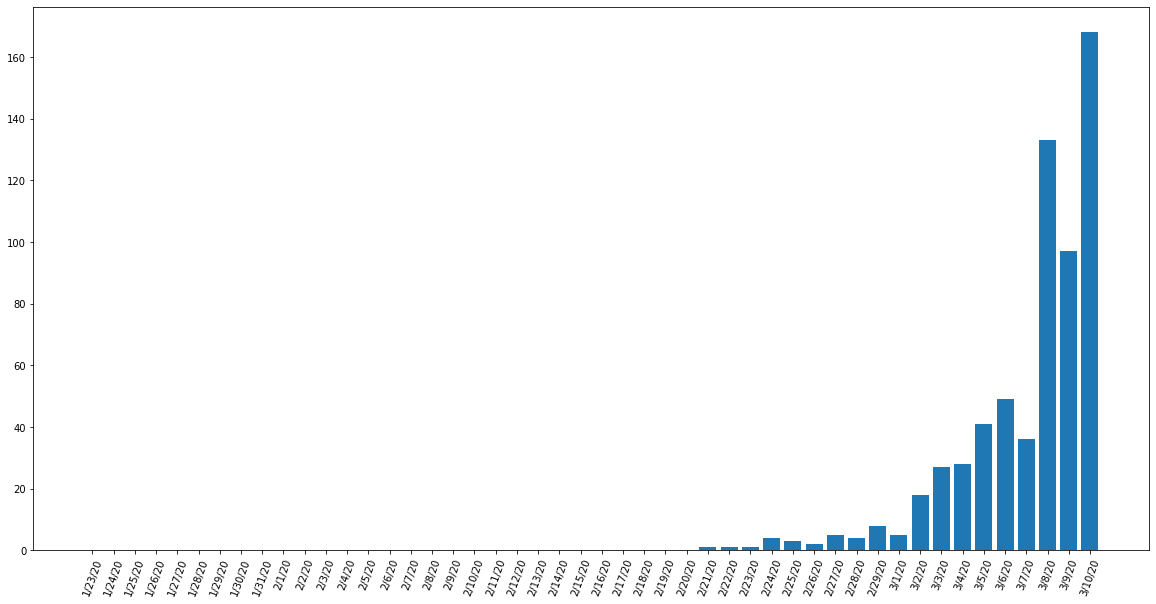

In [8]:
pi = plt.bar(days[1:days.size], new_deaths_per_day_italy[:days.size])
#ax.legend()
plt.xticks(rotation=70)
plt.show()

### Case fatality

In [9]:
infections_italy = cid.values[cid.size - 1][0] 
deaths_italy = did.values[cid.size - 1][0];
case_fatality_italy = (deaths_italy / infections_italy) * 100 
print("Italy case fatality = %.1f"%case_fatality_italy)  

Italy case fatality = 6.2


## Germany

### Confirmed infections

In [10]:
confirmed_germany_per_day = confirmed[confirmed['Country/Region'] == 'Germany']
cgd = confirmed_germany_per_day.T['2/17/20':]; cgd.T

,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
46,16,16,16,16,16,16,16,16,17,27,...,130,159,196,262,482,670,799,1040,1176,1457


### Cumulative deaths

In [11]:
cumulative_deaths_per_day_germany = deaths[deaths['Country/Region'] == 'Germany']
dgd = cumulative_deaths_per_day_germany.T['2/17/20':]; dgd.T

,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


### Deaths per day

In [12]:
cumulative_deaths_per_day_germany_array = cumulative_deaths_per_day_germany.values[0][start_dates_index:]
cumulative_deaths_per_day_germany_array.size
new_deaths_per_day_germany = [cumulative_deaths_per_day_germany_array[i + 1] - cumulative_deaths_per_day_germany_array[i] for i in range(0,days.size - 1)]

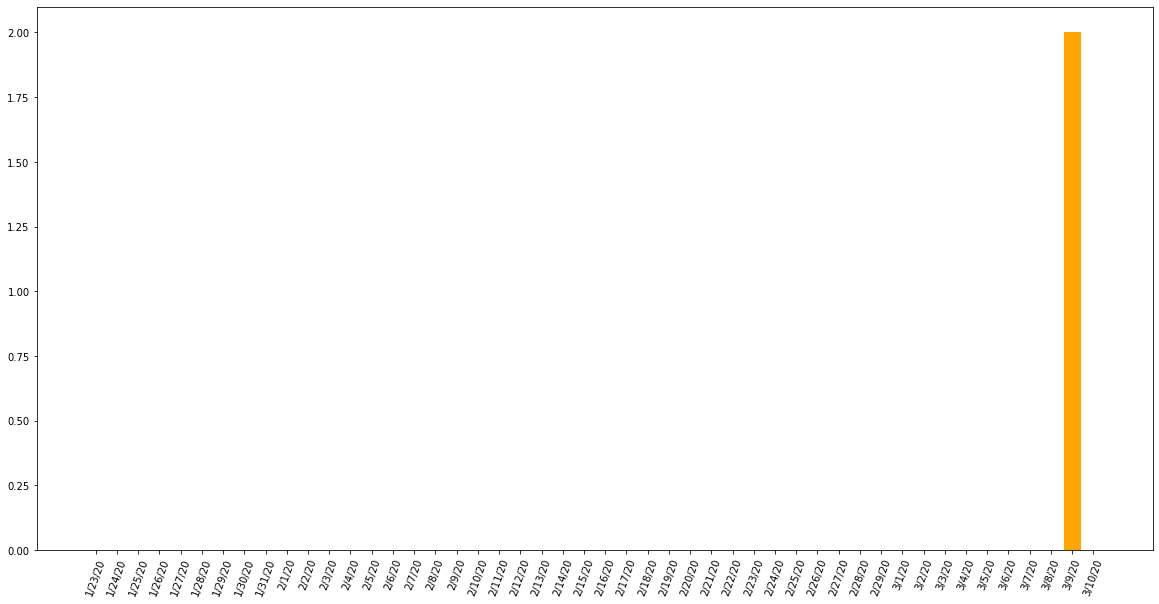

In [13]:
pg = plt.bar(days[1:days.size], new_deaths_per_day_germany[:days.size], color='orange')
#ax.legend()
plt.xticks(rotation=70)
plt.show()

### Case fatality

In [14]:
infections_germany = cgd.values[cgd.size - 1][0] 
deaths_germany = dgd.values[cgd.size - 1][0];
case_fatality_germany = (deaths_germany / infections_germany) * 100 
print("Germany case fatality = %.1f"%case_fatality_germany)  

Germany case fatality = 0.1


## France

### Confirmed infections

In [15]:
confirmed_france_per_day = confirmed[confirmed['Country/Region'] == 'France']
cfd = confirmed_france_per_day.T['2/17/20':]; cfd.T

,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
36,12,12,12,12,12,12,12,12,14,18,...,130,191,204,285,377,653,949,1126,1209,1784


### Cumulative deaths

In [16]:
cumulative_deaths_per_day_france = deaths[deaths['Country/Region'] == 'France']
dfd = cumulative_deaths_per_day_france.T['2/17/20':]; dfd.T

,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
36,1,1,1,1,1,1,1,1,1,2,...,2,3,4,4,6,9,11,19,19,33


### Deaths per day

In [17]:
cumulative_deaths_per_day_france_array = cumulative_deaths_per_day_france.values[0][start_dates_index:]
cumulative_deaths_per_day_france_array.size
new_deaths_per_day_france = [cumulative_deaths_per_day_france_array[i + 1] - cumulative_deaths_per_day_france_array[i] for i in range(0,days.size - 1)]

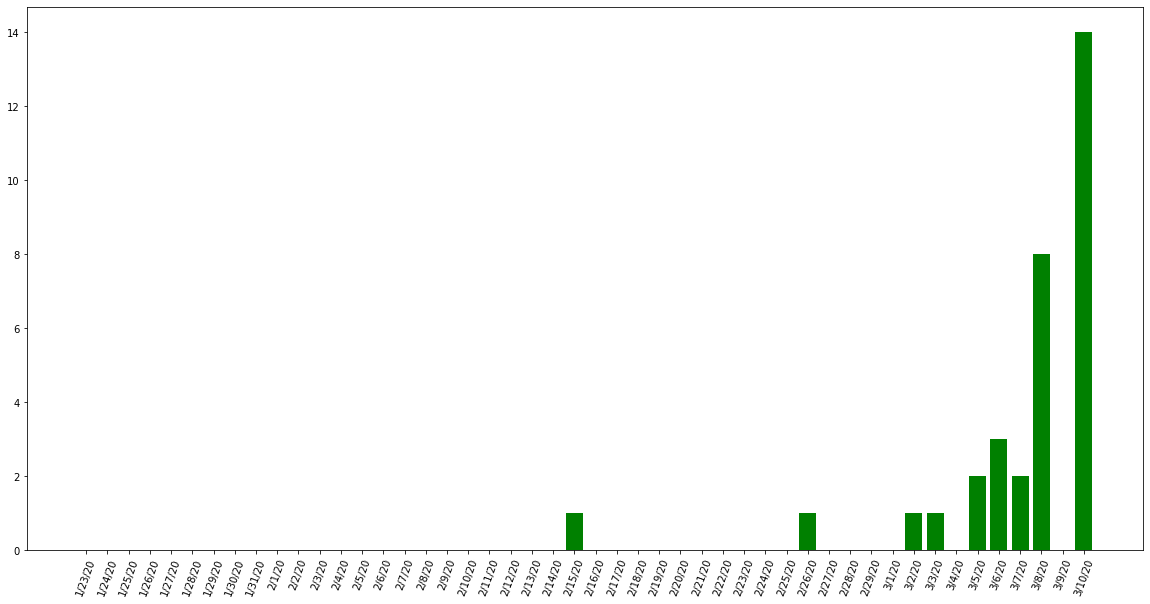

In [18]:
pf = plt.bar(days[1:days.size], new_deaths_per_day_france[:days.size], color='green')
plt.xticks(rotation=70)
plt.show()

### Case fatality

In [19]:
infections_france = cfd.values[cfd.size - 1][0] 
deaths_france = dfd.values[cfd.size - 1][0];
case_fatality_france = (deaths_france / infections_france) * 100 
print("France case fatality = %.1f"%case_fatality_france)  

France case fatality = 1.8


## Merged graphs for Italy, Germany and France

In [20]:
# resize the default plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

### Confirmed infections

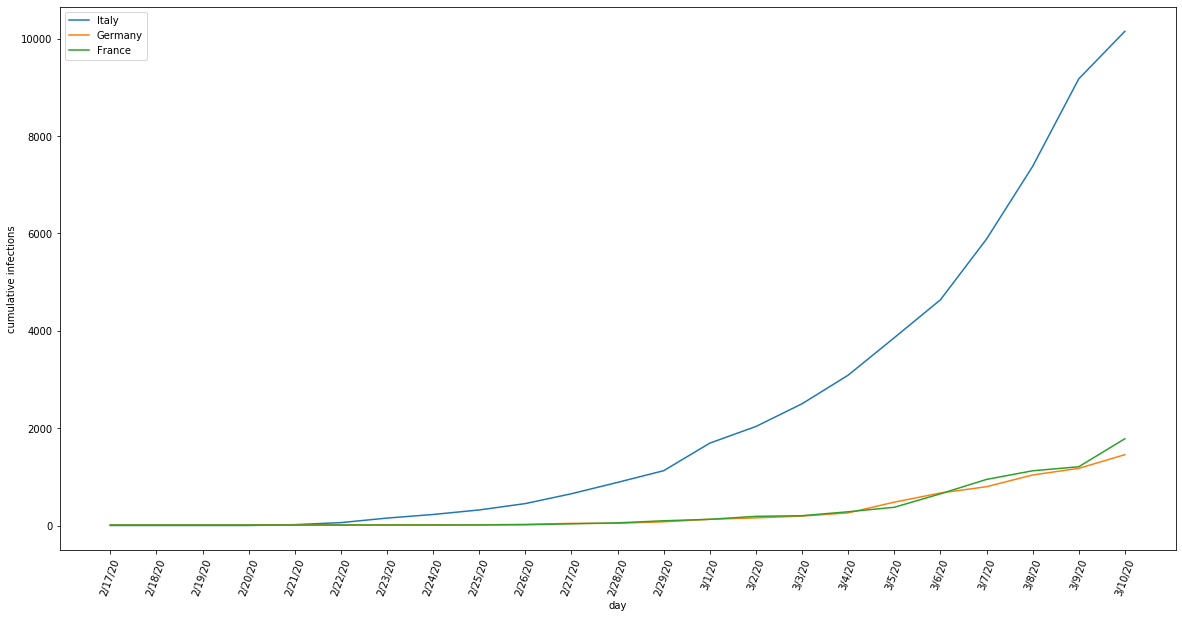

In [21]:
# add labels
plt.xlabel("day")
plt.ylabel("cumulative infections");
plt.xticks(rotation=70)
# plot the data
plt.plot(cid, label='Italy')
plt.plot(cgd, label='Germany')
plt.plot(cfd, label='France')
# add legend
plt.legend(['Italy','Germany', 'France'])

### Cumulative deaths

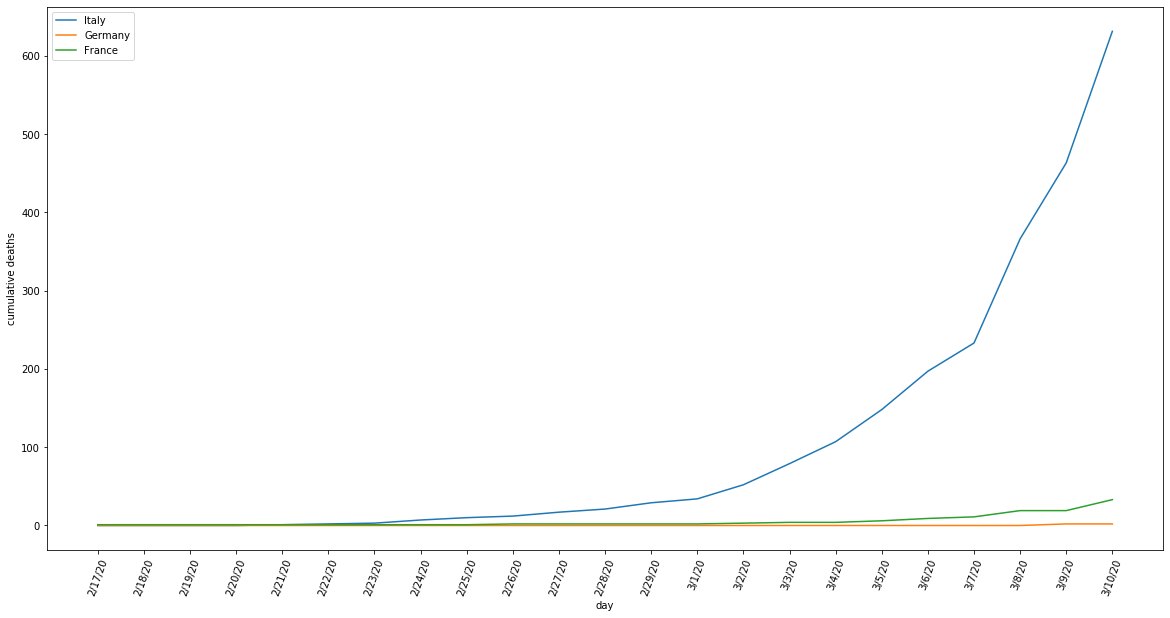

In [22]:
# add labels
plt.xlabel("day")
plt.ylabel("cumulative deaths");
plt.xticks(rotation=70)
# plot the data
plt.plot(did, label='Italy')
plt.plot(dgd, label='Germany')
plt.plot(dfd, label='France')
# add legend
plt.legend(['Italy','Germany', 'France'])

### Deaths per day

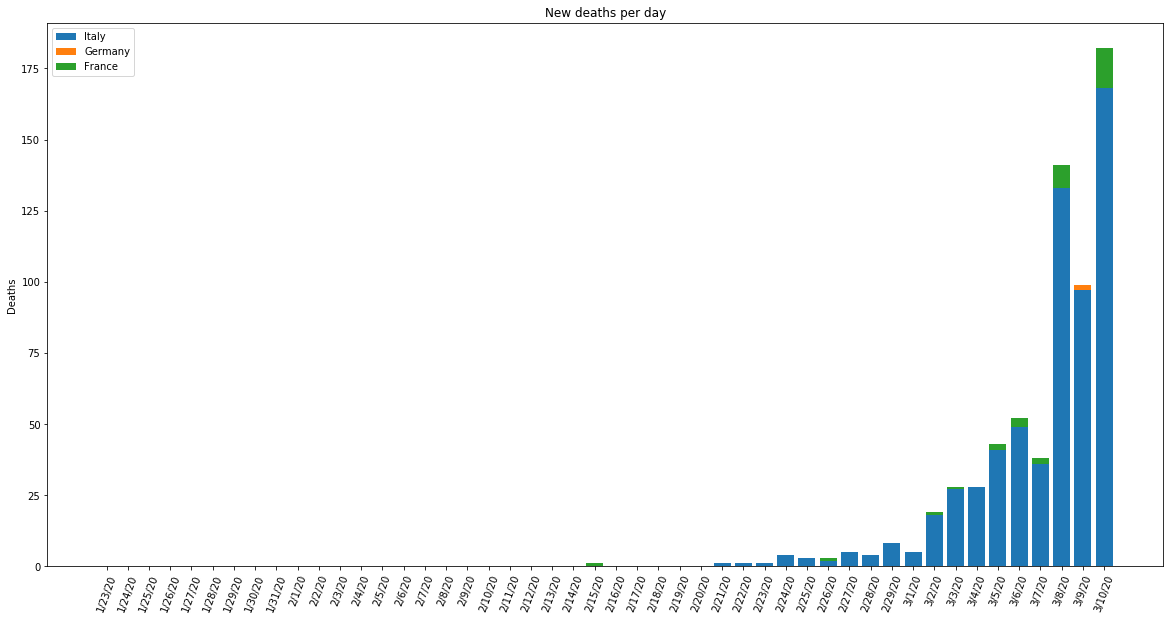

In [23]:
fig, ax = plt.subplots()
plt.ylabel('Deaths')
plt.title('New deaths per day')
pi = plt.bar(days[1:days.size], new_deaths_per_day_italy[:days.size])
pg = plt.bar(days[1:days.size], new_deaths_per_day_germany[:days.size], bottom = new_deaths_per_day_italy[:days.size])
pf = plt.bar(days[1:days.size], new_deaths_per_day_france[:days.size], bottom = new_deaths_per_day_italy[:days.size])
plt.xticks(rotation=70)
plt.legend((pi[0], pg[0], pf[0]), ('Italy', 'Germany', 'France'))
plt.show()